In [73]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [74]:
df = pd.read_csv("car_purchasing.csv", encoding = "ISO-8859-1")
df

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [75]:
df.dropna()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [76]:
df.columns

Index(['customer name', 'customer e-mail', 'country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

In [77]:
df.isnull().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [78]:
df.value_counts()

customer name        customer e-mail                      country      gender  age        annual Salary  credit card debt  net worth     car purchase amount
Abel Stanton         eu.lacus.Quisque@congue.edu          Ecuador      1       39.717155  48567.07462    9724.031647       407401.37760  30394.82494            1
Octavius C. Spencer  Curabitur.consequat@miDuisrisus.com  Bangladesh   0       32.874925  61889.61618    12024.484570      133226.06170  24184.07443            1
Ortiz, Drew P.       tincidunt@vel.edu                    Seychelles   0       51.560544  49393.46784    11521.618900      475263.27590  42793.99320            1
Orson Kirby          cursus@nectellus.co.uk               Puerto Rico  1       53.354188  50867.94007    16732.306380      344916.17680  41357.17897            1
Orson Hyde           gravida.sit@eget.net                 Djibouti     1       37.497640  68688.40199    15796.318380      375889.63810  38930.55234            1
                                 

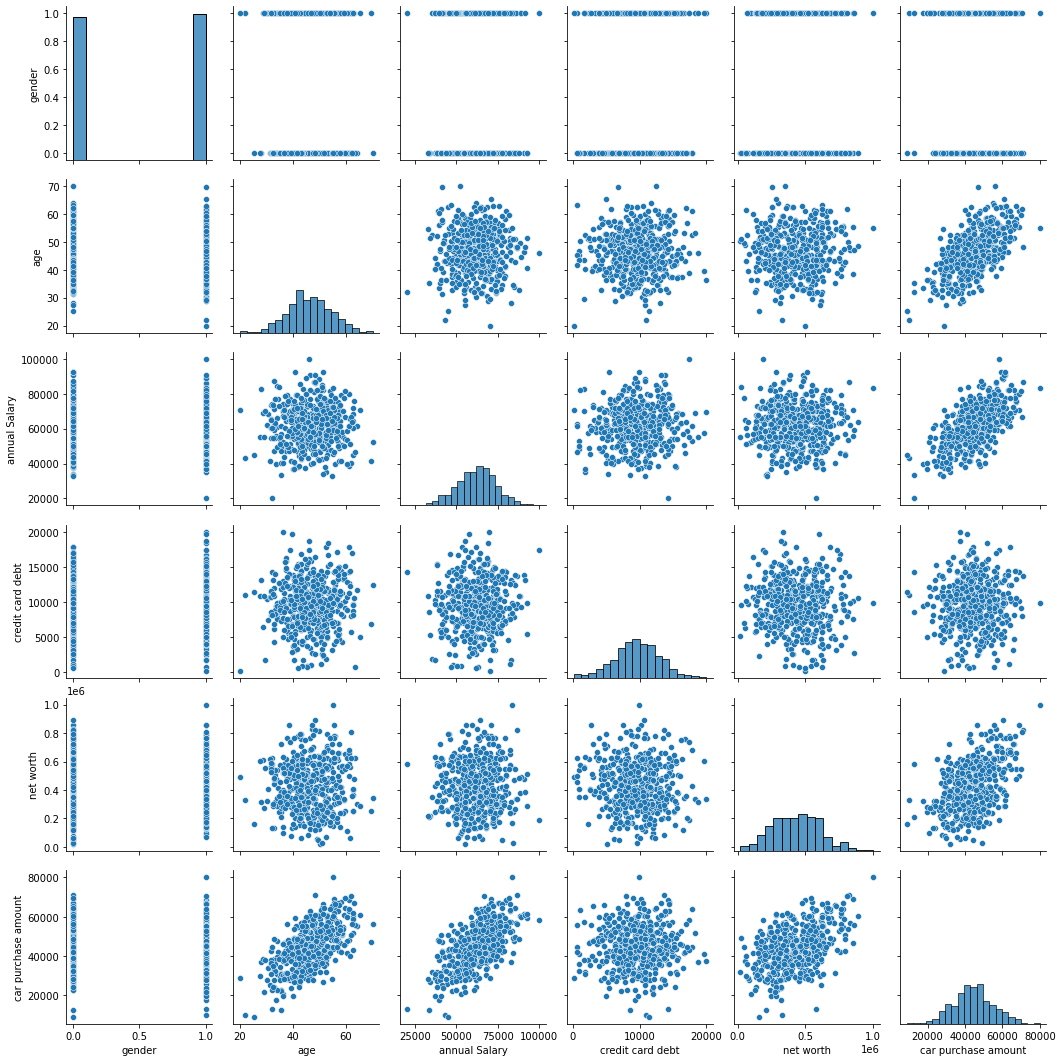

In [79]:
sns.pairplot(df)

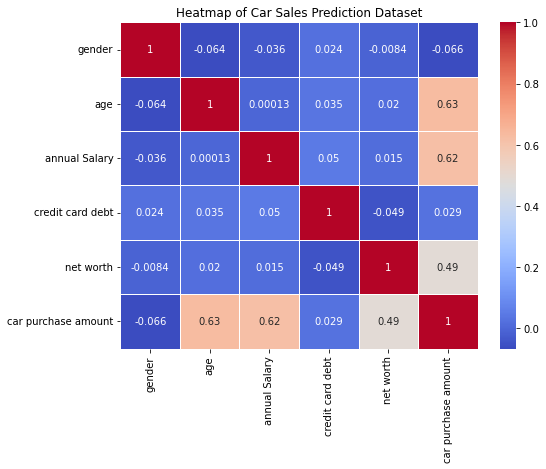

In [80]:
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Car Sales Prediction Dataset')
plt.show()

In [81]:
drop_columns = ["customer name", "customer e-mail", "country", "gender"]
df.drop(columns=drop_columns, axis=1, inplace=True)

In [82]:
df

,age,annual Salary,credit card debt,net worth,car purchase amount
0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...
495,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [85]:
X = df.drop("car purchase amount", axis=1)
y = df["car purchase amount"]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [47]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [49]:
random_forest = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
random_forest.fit(X_train_scaled, y_train)


RandomForestRegressor(max_depth=5, random_state=42)

In [50]:
y_pred = random_forest.predict(X_test_scaled)

In [51]:
y_pred

array([47834.00554517, 42303.25038977, 41806.24126315, 37202.57301222,
       51891.10400117, 49749.46750149, 37082.76526592, 41282.61676919,
       44276.88207022, 40734.50877381, 38627.06760205, 46101.66566204,
       40386.56034548, 42617.82990523, 50921.60751074, 44380.53203977,
       38428.22667198, 48521.66488843, 53609.81840667, 44307.66190351,
       34877.79725733, 33266.2049394 , 41551.90599294, 45507.77857277,
       46806.53043245, 51337.6301017 , 45847.40171923, 42460.54964457,
       41473.11512494, 29477.21250499, 38878.7102964 , 24643.59668225,
       45105.28954862, 64174.48901206, 30638.3477434 , 41132.1230895 ,
       34014.20281979, 49611.59993591, 45181.72964348, 45631.73089749,
       47615.79922277, 35324.12451328, 32711.39832474, 40868.99006647,
       53494.5151528 , 46029.31376708, 40680.94164484, 44464.91779774,
       53632.08802729, 48746.58153145, 33868.13888126, 37855.16923851,
       53674.66404162, 45758.32031574, 48460.40023591, 32198.4718285 ,
      

In [52]:
dfs = {'Prediction ': y_pred, 'Truth values ': y_test}
result = pd.DataFrame(dfs)

result

,Prediction,Truth values
367,47834.005545,46710.52519
286,42303.250390,41575.34739
353,41806.241263,42793.99320
326,37202.573012,36543.93642
184,51891.104001,54387.27727
...,...,...
136,46937.168645,47693.23482
131,36501.194162,38243.66481
202,41238.006170,40660.38317
213,46635.560130,44577.44829


In [86]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Mean Squared Error (MSE): 212750037.2232
R-squared (R2): -0.7140


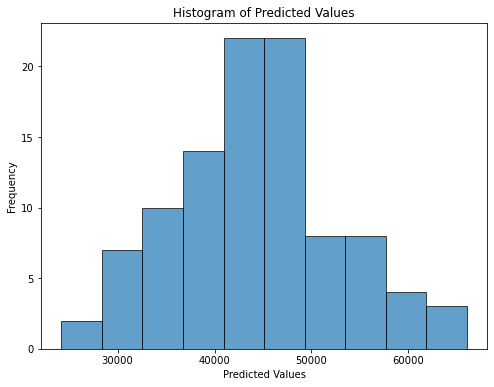

In [87]:
# Create a histogram of y_pred
plt.figure(figsize=(8, 6))
plt.hist(y_pred, bins=10, edgecolor='black', alpha=0.7)
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Values')
plt.show()
